In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
#remove null values
df = df.dropna()
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [5]:
#distance by euclidean formula
df['distance']= (
    ((df['dropoff_latitude'] - df['pickup_latitude'])**2 +
     (df['dropoff_longitude'] - df['pickup_longitude'])**2)* 0.5
)

# filter for reasonable fare_amount ,passenger_count,distance
df= df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]
df=df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]
df = df[df['distance'] < 5]

In [6]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day

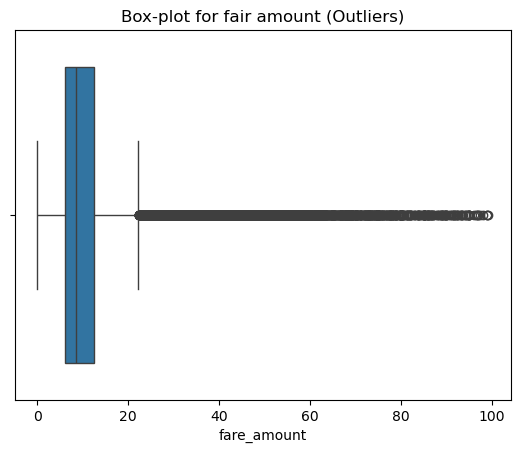

In [7]:
#outliers
sns.boxplot(x = df['fare_amount'])
plt.title('Box-plot for fair amount (Outliers)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

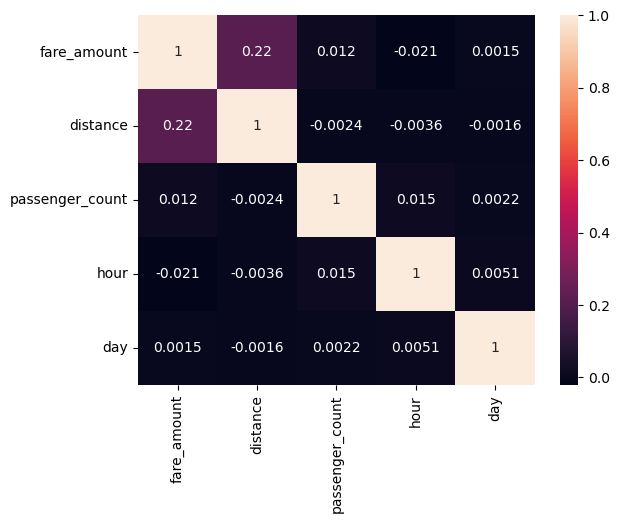

In [8]:
#correlation-heatmap
corr = df[['fare_amount','distance','passenger_count','hour','day']].corr()
sns.heatmap(corr,annot=True)
plt.show

In [9]:
X = df[['distance', 'passenger_count', 'hour', 'day']]
y = df['fare_amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [10]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation function
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}\n")

In [11]:
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest Regression")

Linear Regression Results:
  R² Score: 0.0663
  RMSE: 9.0285

Random Forest Regression Results:
  R² Score: 0.7462
  RMSE: 4.7075

